In [1]:
# coding: utf-8
# f(x0, x1) = x0제곱 + x1 제곱의 Gradient Descent 를 2차원에 표현


In [4]:
import os, sys
print(os.getcwd())

c:\Users\EL90\OneDrive - (주)엘릭서\MS AI 8기\수업자료\workspace\DL-Excersize\notebooks\DL3_20241006\ch03


In [25]:
import numpy as np
import matplotlib.pylab as plt

#2차원으로 표현

def _numerical_gredient_no_batch(f,x):
    h = 1e-4    # = 0.0001 의미?
    grad = np.zeros_like(x)  #x와 형상이 같은 배열을 생성 ???무슨말이징

    for idx in range(x.size):
        tmp_val = x[idx]

        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val   #앞에서 f+h, f-h 구하는 데에 tmp_val 사용하고 다시 원복하는 코드
    return grad

def numerical_gredient(f,X):
    if X.ndim == 1:
        return _numerical_gredient_no_batch(f,X)
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            grad[idx] = _numerical_gredient_no_batch(f,x)

        return grad
    

def gradient_descent(f, init_x, lr = 0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append(x.copy())

        grad = numerical_gredient(f,x)
        x -= lr * grad
    return x, np.array(x_history)

def function_2(x):
    return x[0]**2 + x[1]**2



# init_x = np.array([-3.0, 4,0])  #뭔 의미지?
# lr = 0.1   # 기울기?
# step_num = 20
# x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)


# plt.plot([-5,5],[0,0],'--b')
# plt.plot([0,0],[-5,5],'--b')
# plt.plot(x_history[:,0], x_history[:,1],'o')

# plt.xlim(-3.5, 3.5)
# plt.ylim(-4.5,4.5)
# plt.xlabel("X0")
# plt.ylabel("X1")
# plt.show()
    
    



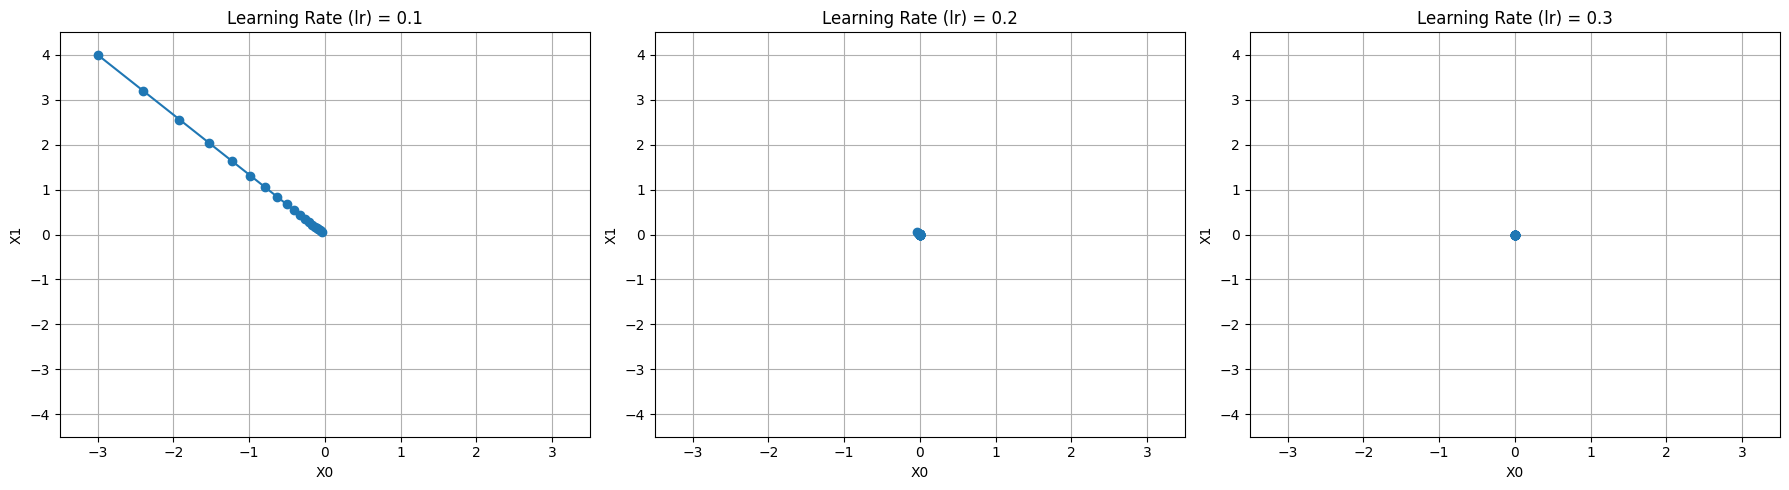

In [26]:
# 1. 초기값 및 설정
init_x = np.array([-3.0, 4.0])  # 반드시 float(소수) 타입으로!
step_num = 20
learning_rates = [0.1, 0.2, 0.3] # 비교할 학습률 리스트

# 2. 1행 3열의 subplot 그림판 생성 (figsize로 크기 지정)
# figsize=(가로 인치, 세로 인치)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 3. for 문으로 각 학습률(lr)과 축(ax)을 순회
# zip()은 learning_rates와 axes의 요소를 하나씩 짝지어 줌
for lr, ax in zip(learning_rates, axes):
    
    # 4. 경사 하강법 실행
    x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)
    
    # 5. 해당 축(ax)에 결과 플로팅
    # 'o-'는 점(o)과 선(-)을 함께 그리라는 의미
    ax.plot(x_history[:, 0], x_history[:, 1], 'o-')
    
    # 6. 축 설정 및 제목 (table title)에 학습률 삽입
    ax.set_xlim(-3.5, 3.5)
    ax.set_ylim(-4.5, 4.5)
    ax.set_xlabel("X0")
    ax.set_ylabel("X1")
    ax.set_title(f"Learning Rate (lr) = {lr}") # 제목 설정
    ax.grid(True) # 격자(눈금선) 추가

# 7. 전체 플롯을 저장하고 화면에 표시
plt.tight_layout() # 그래프들이 겹치지 않게 자동 조정
plt.savefig("gradient_descent_comparison.png") # 파일로 저장
plt.show() # 화면에 표시

# 경사하강법 Gradient Descent

 - 오차가 최소가 되도록 가중치를 갱신
  - 가중치 w를 행신하는 방법으로 경사하강법을 사용
  - 학습률이 없이는 가중치를 못찾아 가기때문에...? 조금씩 반영을 하는 것...??


  ![alt text](image.png)
  ![alt text](image-1.png)
  ![alt text](image-2.png)

# 학습알고리즘 구현 - step 1 미니배치

 - gradient descent 가 간단해 보이지만 학습속도 부하가 많이 듬
 
![alt text](image-4.png)
![alt text](image-3.png)

![alt text](image-5.png)
![alt text](image-6.png)

In [39]:
import sys
import os
sys.path.append(os.path.join('..', '..', '..'))
import numpy as np
# TwoLayerNet 클래스가 정의된 파일을 불러옵니다.
from common.functions import *
from two_layer_net import TwoLayerNet



# 이 테스트를 위해 임의의 데이터와 클래스를 준비합니다.
# (실제 환경에서는 common 폴더의 함수들이 필요합니다.)
input_size = 784
hidden_size = 50
output_size = 10
network = TwoLayerNet(input_size, hidden_size, output_size)

# 무작위 입력 데이터와 정답 레이블 (미니 배치 3개 가정)
x = np.random.rand(3, input_size)  # 입력 데이터 (3x784)
t = np.array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0], 
              [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
              [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]) # 정답 레이블 (3x10, One-Hot)

ImportError: cannot import name 'TwoLayerNet' from 'two_layer_net' (c:\Users\EL90\OneDrive - (주)엘릭서\MS AI 8기\수업자료\workspace\DL-Excersize\notebooks\DL3_20241006\ch03\two_layer_net.py)